In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTING DATASET
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs') 
df=dataset['train'].to_pandas()

#CLEANING THE DATA
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def clean_strings(string_list):
    if pd.notna(string_list):
        return ast.literal_eval(string_list)
    else:
        return string_list
df['job_skills']=df['job_skills'].apply(clean_strings)

In [4]:
df_US=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')]

Text(0, 0.5, 'Count of Jobs')

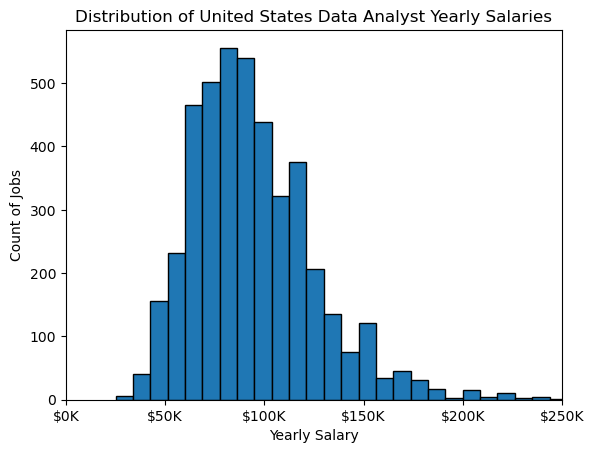

In [11]:
#in histograms you only provide the column to plot it will automatically do the necessary aggregations
df_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')  #bins define in how many intervals will the data will be divided

plt.xlim(0,250000)

ax=plt.gca() #get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Count of Jobs')